# FENE beadspring experiment data analysis

In [1]:
import os

import data_analysis.data.read as read
import data_analysis.transform.transform as transform
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from pandarallel import pandarallel

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
pandarallel.initialize(
    nb_workers=24,
    progress_bar=True,
    use_memory_fs=False
)

INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## Read data

In [5]:
PATH_EXPERIMENT = pathlib.Path(
    "/scratch/ws/0/s4610340-bt-eea1-md-workspace/data/experiment_results/FENE-beadspring/36bbf690")

PATHS_TRAJECTORIES = [
    PATH_EXPERIMENT / "data/polymer_relax.out",
    PATH_EXPERIMENT / "data/polymer.out",
]

PATH_SYSTEM_DEF = PATH_EXPERIMENT / "data/initial_system.data"

### Trajectory df

In [6]:
df_trajectory_raw = read.read_multiple_raw_trajectory_dfs(PATHS_TRAJECTORIES)
df_trajectory_raw

,t,id,type,x,y,z,ix,iy,iz
0,0,1,1,0.000000,0.000000,0.000000,0,0,0
1,0,2,1,0.351522,0.037976,0.903266,0,0,0
2,0,3,2,1.077680,0.458887,1.389510,0,0,0
3,0,4,2,1.089370,0.904661,2.250930,0,0,0
4,0,5,2,1.822100,1.533330,2.344580,0,0,0
...,...,...,...,...,...,...,...,...,...
28155,38740000,28156,2,13.110800,8.458320,24.962800,0,0,0
28156,38740000,28157,2,12.185400,8.644680,24.839300,0,0,0
28157,38740000,28158,2,11.285700,8.564880,24.542500,0,0,0
28158,38740000,28159,2,10.526400,8.594050,23.981000,0,0,0


### System def

In [7]:
system = read.read_lammps_system_data(PATH_SYSTEM_DEF)
system.atoms

,molecule-ID,type,x,y,z,ix,iy,iz
1,1,1,0.000000,0.000000,0.000000,0,0,0
2,1,1,0.351522,0.037976,0.903266,0,0,0
3,1,2,1.077677,0.458887,1.389511,0,0,0
4,1,2,1.089366,0.904661,2.250933,0,0,0
5,1,2,1.822102,1.533333,2.344581,0,0,0
...,...,...,...,...,...,...,...,...
28156,220,2,62.143956,68.211728,56.813392,0,0,0
28157,220,2,62.691958,68.280566,57.610796,0,0,0
28158,220,2,63.539691,68.444647,58.052754,0,0,0
28159,220,2,64.096341,68.993900,58.626655,0,0,0


In [8]:
system.bonds

,type,atom1,atom2
1,1,1,2
2,1,2,3
3,1,3,4
4,1,4,5
5,1,5,6
...,...,...,...
27936,1,28155,28156
27937,1,28156,28157
27938,1,28157,28158
27939,1,28158,28159


In [9]:
system.angles

,type,atom1,atom2,atom3
1,1,1,2,3
2,1,2,3,4
3,1,3,4,5
4,1,4,5,6
5,1,5,6,7
...,...,...,...,...
27716,1,28154,28155,28156
27717,1,28155,28156,28157
27718,1,28156,28157,28158
27719,1,28157,28158,28159


In [10]:
system.box

-100.000000 100.000000  xlo xhi
-100.000000 100.000000  ylo yhi
-100.000000 100.000000  zlo zhi

## Process data

Join molecule id information

In [11]:
df_trajectory = transform.join_raw_trajectory_df_with_system_data(
    df_trajectory_raw, system
)
df_trajectory

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,0,1,1,0.000000,0.000000,0.000000,0,0,0,1
1,0,2,1,0.351522,0.037976,0.903266,0,0,0,1
2,0,3,2,1.077680,0.458887,1.389510,0,0,0,1
3,0,4,2,1.089370,0.904661,2.250930,0,0,0,1
4,0,5,2,1.822100,1.533330,2.344580,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
28155,38740000,28156,2,13.110800,8.458320,24.962800,0,0,0,220
28156,38740000,28157,2,12.185400,8.644680,24.839300,0,0,0,220
28157,38740000,28158,2,11.285700,8.564880,24.542500,0,0,0,220
28158,38740000,28159,2,10.526400,8.594050,23.981000,0,0,0,220


Unfold coordinates

In [22]:
df_trajectory_unfolded = transform.unfold_coordinates_df(df_trajectory, system)
df_trajectory_unfolded

,t,id,type,x,y,z,ix,iy,iz,molecule-ID
0,0,1,1,0.000000,0.000000,0.000000,0,0,0,1
1,0,2,1,0.351522,0.037976,0.903266,0,0,0,1
2,0,3,2,1.077680,0.458887,1.389510,0,0,0,1
3,0,4,2,1.089370,0.904661,2.250930,0,0,0,1
4,0,5,2,1.822100,1.533330,2.344580,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
28155,38740000,28156,2,13.110800,8.458320,24.962800,0,0,0,220
28156,38740000,28157,2,12.185400,8.644680,24.839300,0,0,0,220
28157,38740000,28158,2,11.285700,8.564880,24.542500,0,0,0,220
28158,38740000,28159,2,10.526400,8.594050,23.981000,0,0,0,220


## Calculate and plot observables

### End-to-End distance $\vec{R}$

In [13]:
df_ete = transform.calc_end_to_end_df(df_trajectory_unfolded)
df_ete

R_x       R_y      R_z           R
molecule-ID t                                                
1           0         65.54320  62.24900  61.8005  109.499547
            100000    58.47300  62.49100  48.4201   98.329664
            200000    57.85950  50.02520  52.4517   92.743858
            300000    56.17000  52.39170  49.9179   91.606527
            400000    60.86280  48.16940  54.3920   94.779012
...                        ...       ...      ...         ...
220         38700000   6.30479   9.79584  22.8842   25.678697
            38710000   9.96888  17.28420  24.1629   31.336367
            38720000   8.44850  15.21310  25.4330   30.816441
            38730000   7.69795   8.79959  27.3807   29.772369
            38740000   9.87371   8.60275  23.2991   26.727243

[555500 rows x 4 columns]

<Axes: xlabel='t'>

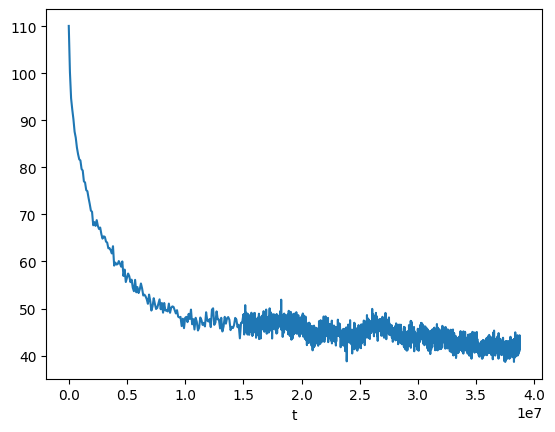

In [29]:
df_ete.groupby("t").sample(n=100).groupby("t")["R"].mean().plot()

### Change of end-to-end distance over time $g_4$

$g_4(t) = \langle (\vec{R}(t) - \vec{R}(0))^2 \rangle$

In [18]:
df_ete_change = transform.calculate_ete_change_ens_avg_df(df_ete)
df_ete_change

t
0                0.000000
100000       15036.309002
200000       27304.076754
300000       38747.134533
400000       48276.001890
                ...      
38700000    889748.857787
38710000    887369.515839
38720000    886906.761709
38730000    893642.009703
38740000    897524.878794
Length: 2525, dtype: float64

<Axes: xlabel='t'>

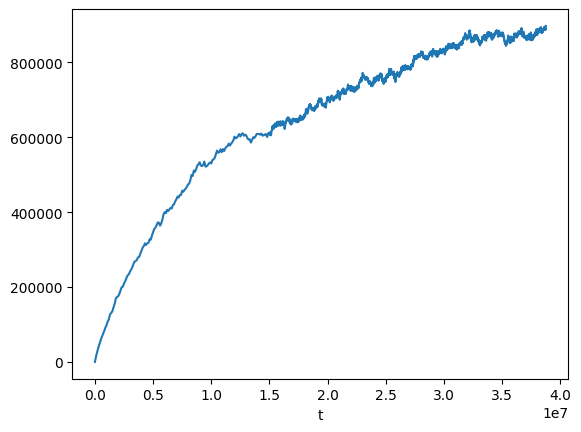

In [19]:
df_ete_change.plot()

### Average distance between neighbours $l^2$
$l^2 = \langle (r_k - r_{k-1})^2 \rangle $

In [20]:
l_squared = transform.calculate_neigh_distance_avg_df(df_trajectory_unfolded)
l_squared

0.9421349332079658